In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 16.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=d43f282c26a218ffbc3fb136ace90523cdc807dc32e8ea0da936271c928cb45e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/Colab Notebooks/AI_HW1/'

import os
os.listdir(data_dir)

['AI Machine Learning: Homework 1.ipynb', 'covid_sentiments.xlsx', 'Stars.csv']

In [ ]:
def get_data():
  df_stars = pd.read_csv(data_dir+'Stars.csv')
  return df_stars

print(len(get_data()))
get_data()

240


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


Population per class:    0
0  40
1  40
2  40
3  40
4  40
5  40
Proportion Chance Criterion: 16.67%
1.25 * Proportion Chance Criterion: 20.83%


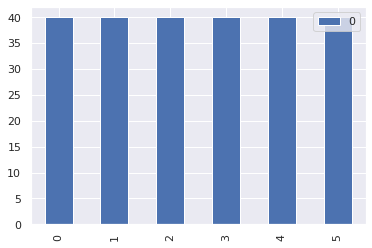

In [ ]:
from collections import Counter

def calculate_pcc():
  df = get_data()
  state_counts = Counter(df['Type'])
  df_state = pd.DataFrame.from_dict(state_counts, orient='index')
  df_state.plot(kind='bar')

  num=(df_state[0]/df_state[0].sum())**2

  print("Population per class:{}".format(df_state))

  print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
  print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

calculate_pcc()

In [ ]:
def split_df():
  df = get_data()

  X = df.drop('Type', axis = 1)
  y = df['Type']

  return X, y

split_df()

(     Temperature              L          R    A_M  Color Spectral_Class
 0           3068       0.002400     0.1700  16.12    Red              M
 1           3042       0.000500     0.1542  16.60    Red              M
 2           2600       0.000300     0.1020  18.70    Red              M
 3           2800       0.000200     0.1600  16.65    Red              M
 4           1939       0.000138     0.1030  20.06    Red              M
 ..           ...            ...        ...    ...    ...            ...
 235        38940  374830.000000  1356.0000  -9.93   Blue              O
 236        30839  834042.000000  1194.0000 -10.63   Blue              O
 237         8829  537493.000000  1423.0000 -10.73  White              A
 238         9235  404940.000000  1112.0000 -11.23  White              A
 239        37882  294903.000000  1783.0000  -7.80   Blue              O
 
 [240 rows x 6 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    5
 236    5
 237    5
 238    

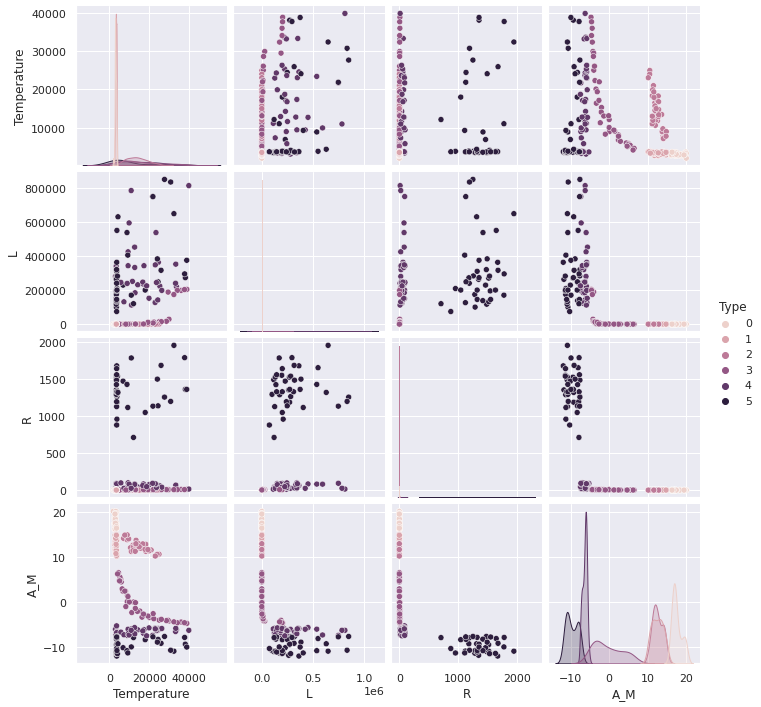

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
df = get_data()
sns.pairplot(df, hue="Type")

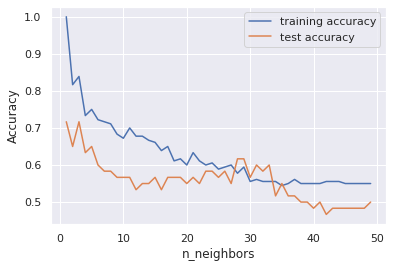

In [ ]:
from sklearn.model_selection import train_test_split

df = get_data()
X_train, X_test, y_train, y_test = train_test_split(df[['Temperature', 'L', 'R', 'A_M']],df['Type'], 
                                                    test_size=0.25,random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass